## **Libraries Installation**

In [3]:
!pip install pyspark
!pip install -q pyspark
!pip install -q handyspark
!pip install handyspark



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=61e7074611c6d533e7ced1abdfc17a3239ee774cc1269994e38f12f5553ff523
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


##  **All libraries imports**

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql.types import StructType
from pyspark.sql.functions import col, isnan, when, count
from handyspark import *
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.ml.feature import StringIndexer, IndexToString
from pyspark.sql.functions import explode
print("Library import completed...")


Library import completed...


## **Session Building for Pyspark**

In [5]:
# Create a SparkSession
spark = SparkSession.builder \
    .appName("Big data project") \
    .config("spark.memory.offHeap.enabled", "true") \
    .config("spark.memory.offHeap.size", "10g") \
    .getOrCreate()

print("Session build successfull...")

Session build successfull...


## **Loading Dataset**

In [8]:
df = spark.read.csv('/dataset.csv', header=True, escape="\"")
print("Upload done")


Upload done


In [9]:
df.show(5,0)

+---+----------------------+----------------------+------------------------------------------------------+--------------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|_c0|track_id              |artists               |album_name                                            |track_name                |popularity|duration_ms|explicit|danceability|energy|key|loudness|mode|speechiness|acousticness|instrumentalness|liveness|valence|tempo  |time_signature|track_genre|
+---+----------------------+----------------------+------------------------------------------------------+--------------------------+----------+-----------+--------+------------+------+---+--------+----+-----------+------------+----------------+--------+-------+-------+--------------+-----------+
|0  |5SuOikwiRyPMVoIQDJUgSV|Gen Hoshino           |Comedy                                                |

In [12]:
# Columns of dataset
columns = df.columns
print("Name of the features \n--------------------")
for i in columns:
    print("->",i)

Name of the features 
--------------------
-> _c0
-> track_id
-> artists
-> album_name
-> track_name
-> popularity
-> duration_ms
-> explicit
-> danceability
-> energy
-> key
-> loudness
-> mode
-> speechiness
-> acousticness
-> instrumentalness
-> liveness
-> valence
-> tempo
-> time_signature
-> track_genre


In [13]:
df.count() #Counts number of instances

114000

In [14]:
data_types = df.dtypes
for feature, data_type in data_types:
    print(f"Feature: {feature}, Data Type: {data_type}")

Feature: _c0, Data Type: string
Feature: track_id, Data Type: string
Feature: artists, Data Type: string
Feature: album_name, Data Type: string
Feature: track_name, Data Type: string
Feature: popularity, Data Type: string
Feature: duration_ms, Data Type: string
Feature: explicit, Data Type: string
Feature: danceability, Data Type: string
Feature: energy, Data Type: string
Feature: key, Data Type: string
Feature: loudness, Data Type: string
Feature: mode, Data Type: string
Feature: speechiness, Data Type: string
Feature: acousticness, Data Type: string
Feature: instrumentalness, Data Type: string
Feature: liveness, Data Type: string
Feature: valence, Data Type: string
Feature: tempo, Data Type: string
Feature: time_signature, Data Type: string
Feature: track_genre, Data Type: string


In [15]:
df.describe().show()

+-------+-----------------+--------------------+-----------------+----------------------------+--------------+-----------------+------------------+--------+-------------------+-------------------+------------------+-----------------+-------------------+-------------------+-------------------+------------------+-------------------+------------------+------------------+------------------+-----------+
|summary|              _c0|            track_id|          artists|                  album_name|    track_name|       popularity|       duration_ms|explicit|       danceability|             energy|               key|         loudness|               mode|        speechiness|       acousticness|  instrumentalness|           liveness|           valence|             tempo|    time_signature|track_genre|
+-------+-----------------+--------------------+-----------------+----------------------------+--------------+-----------------+------------------+--------+-------------------+-------------------+

## **Removing null values**

In [17]:
for i in columns:
    null_count = df.filter(col(i).isNull()).count()
    print(f'Null values in column {i} : {null_count}')

Null values in column _c0 : 0
Null values in column track_id : 0
Null values in column artists : 1
Null values in column album_name : 1
Null values in column track_name : 1
Null values in column popularity : 0
Null values in column duration_ms : 0
Null values in column explicit : 0
Null values in column danceability : 0
Null values in column energy : 0
Null values in column key : 0
Null values in column loudness : 0
Null values in column mode : 0
Null values in column speechiness : 0
Null values in column acousticness : 0
Null values in column instrumentalness : 0
Null values in column liveness : 0
Null values in column valence : 0
Null values in column tempo : 0
Null values in column time_signature : 0
Null values in column track_genre : 0


In [18]:
# There are very few nan values, so it wont matter if we remove the instances containing those nan value
df = df.na.drop()

In [20]:
for i in columns:
    null_count = df.filter(col(i).isNull()).count()
    print(f'Null values in column {i} : {null_count}')

Null values in column _c0 : 0
Null values in column track_id : 0
Null values in column artists : 0
Null values in column album_name : 0
Null values in column track_name : 0
Null values in column popularity : 0
Null values in column duration_ms : 0
Null values in column explicit : 0
Null values in column danceability : 0
Null values in column energy : 0
Null values in column key : 0
Null values in column loudness : 0
Null values in column mode : 0
Null values in column speechiness : 0
Null values in column acousticness : 0
Null values in column instrumentalness : 0
Null values in column liveness : 0
Null values in column valence : 0
Null values in column tempo : 0
Null values in column time_signature : 0
Null values in column track_genre : 0


## **Data Type Conversion**

In [21]:
df = df.withColumn('popularity',col('popularity').cast('float'))
df = df.withColumn('danceability',col('danceability').cast('float'))
df = df.withColumn('energy',col('energy').cast('float'))
df = df.withColumn('key',col('key').cast('int'))
df = df.withColumn('loudness',col('loudness').cast('float'))
df = df.withColumn('mode',col("mode").cast('int'))
df = df.withColumn('speechiness',col('speechiness').cast('float'))
df = df.withColumn('acousticness',col('acousticness').cast('float'))
df = df.withColumn('instrumentalness',col('instrumentalness').cast('float'))
df = df.withColumn('liveness',col("liveness").cast('float'))
df = df.withColumn('valence',col("valence").cast('float'))
df = df.withColumn('tempo',col("tempo").cast('float'))

In [22]:
D_type = df.dtypes
for feature,type in D_type:
  print(f'{feature} --> {type}')

_c0 --> string
track_id --> string
artists --> string
album_name --> string
track_name --> string
popularity --> float
duration_ms --> string
explicit --> string
danceability --> float
energy --> float
key --> int
loudness --> float
mode --> int
speechiness --> float
acousticness --> float
instrumentalness --> float
liveness --> float
valence --> float
tempo --> float
time_signature --> string
track_genre --> string


## **Data Visualizaton**

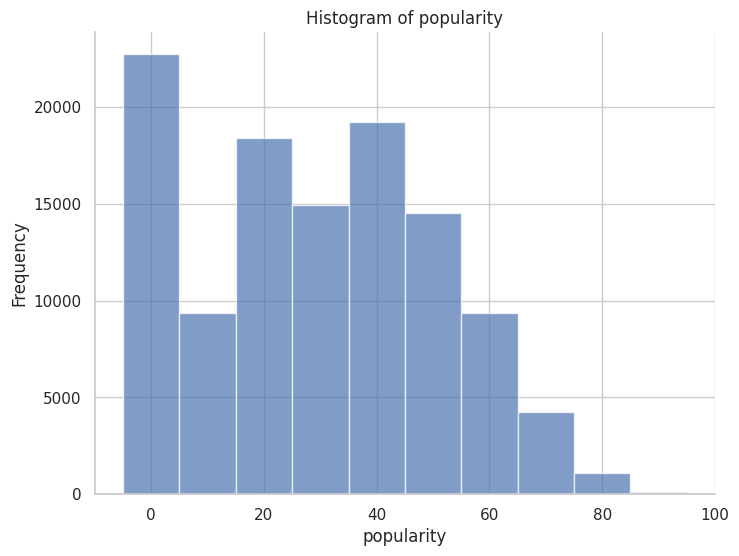

In [23]:

# Set Seaborn style
sns.set(style="whitegrid")  # Choose any Seaborn style you prefer

# Calculate histogram data using PySpark
column_name = 'popularity'  # Replace with your specific column name
data = df.select(column_name).rdd.flatMap(lambda x: x).collect()  # Collect column data

# Compute histogram using numpy
counts, bins = np.histogram(data, bins=10)

# Plot histogram using Matplotlib's bar function
plt.figure(figsize=(8, 6))  # Adjust figure size if needed
plt.bar(bins[:-1], counts, width=np.diff(bins), alpha=0.7)  # Plot histogram as bars
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.title('Histogram of ' + column_name)

# Optionally, you can add more Seaborn-specific features
sns.despine()  # Remove spines from the plot
sns.set_context("notebook")  # Set context for better scaling in Jupyter notebooks

plt.show()


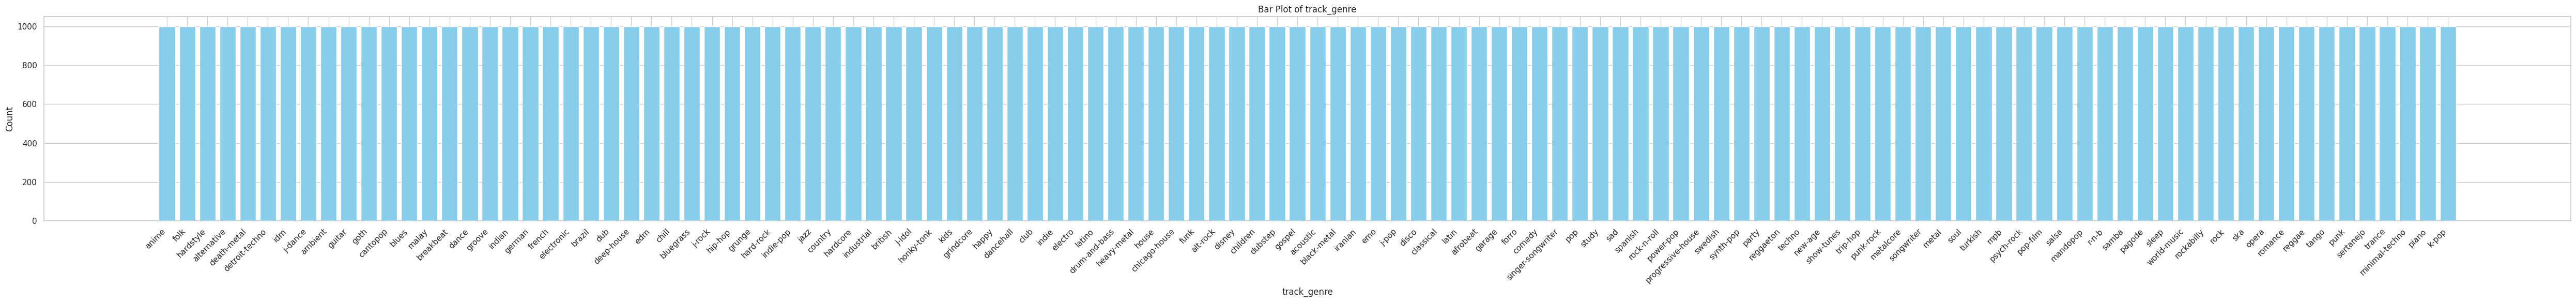

In [24]:
# Import necessary functions and libraries
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Replace 'categorical_column' with the column name you want to analyze
categorical_column = 'track_genre'

# Calculate count for each category in the categorical column
category_counts = df.groupBy(categorical_column).count().orderBy(col("count").desc())

# Convert PySpark DataFrame to Pandas for plotting
category_counts_pandas = category_counts.toPandas()

# Plotting the bar plot using Matplotlib
plt.figure(figsize=(50, 6))
plt.bar(category_counts_pandas[categorical_column], category_counts_pandas['count'], color='skyblue')
plt.xlabel(categorical_column)
plt.ylabel('Count')
plt.title(f'Bar Plot of {categorical_column}')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


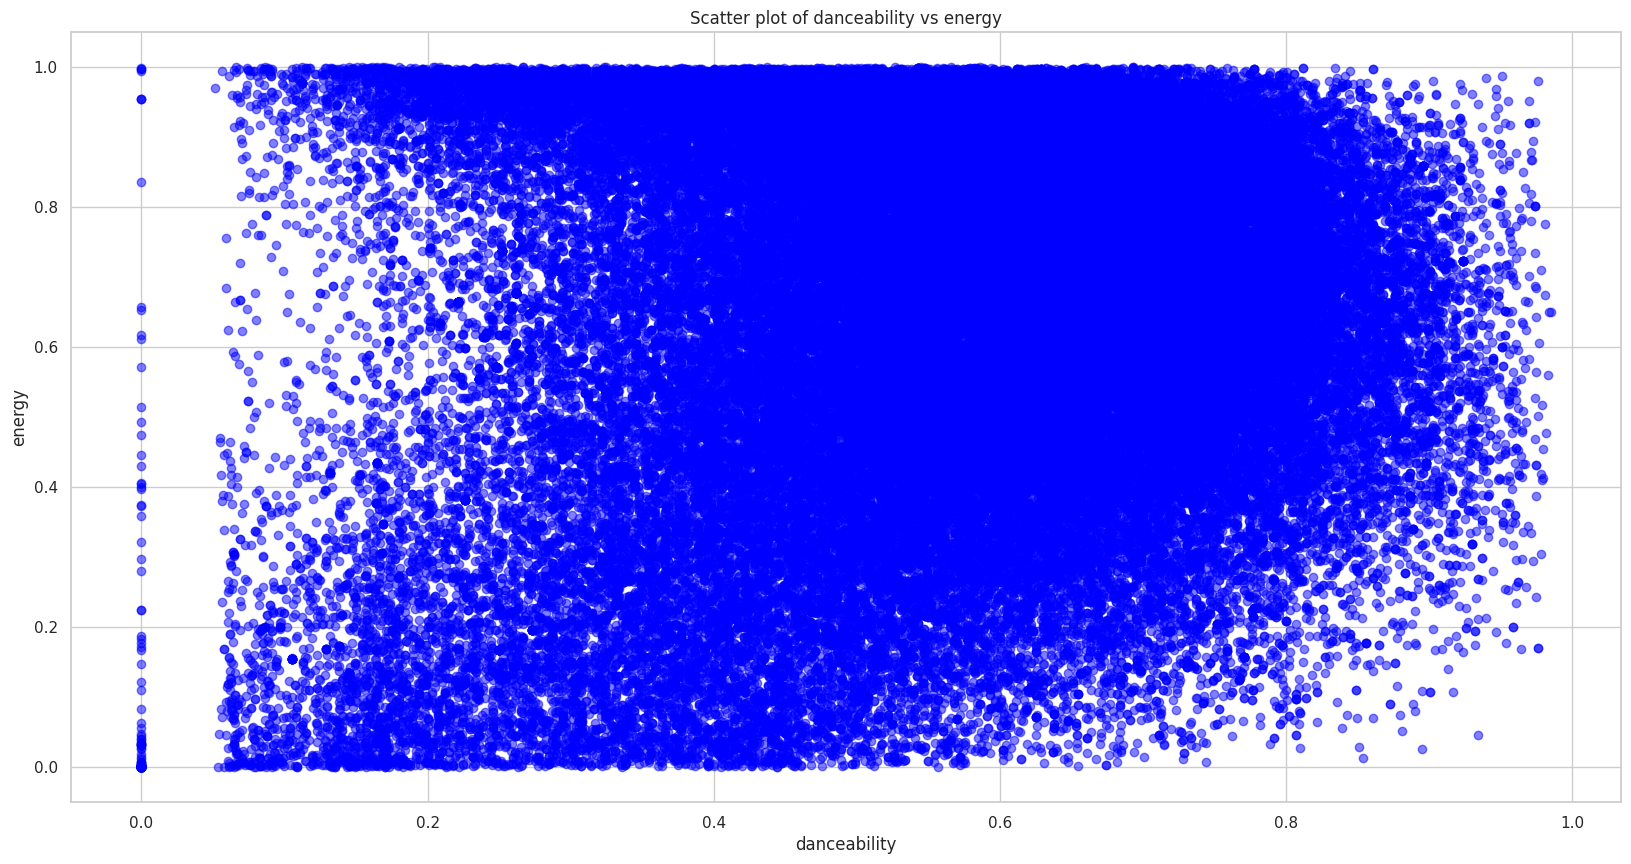

In [25]:
# Import necessary functions and libraries
from pyspark.sql.functions import col
import matplotlib.pyplot as plt

# Replace 'column_1' and 'column_2' with the column names you want to visualize
column_1 = 'danceability'
column_2 = 'energy'

# Select the columns of interest from the PySpark DataFrame and convert to Pandas for plotting
data = df.select(column_1, column_2).toPandas()

# Extract the columns as arrays for scatter plot
x = data[column_1]
y = data[column_2]

# Create a scatter plot using Matplotlib
plt.figure(figsize=(20, 10))
plt.scatter(x, y, alpha=0.5, color='blue')
plt.xlabel(column_1)
plt.ylabel(column_2)
plt.title(f'Scatter plot of {column_1} vs {column_2}')
plt.grid(True)
plt.show()


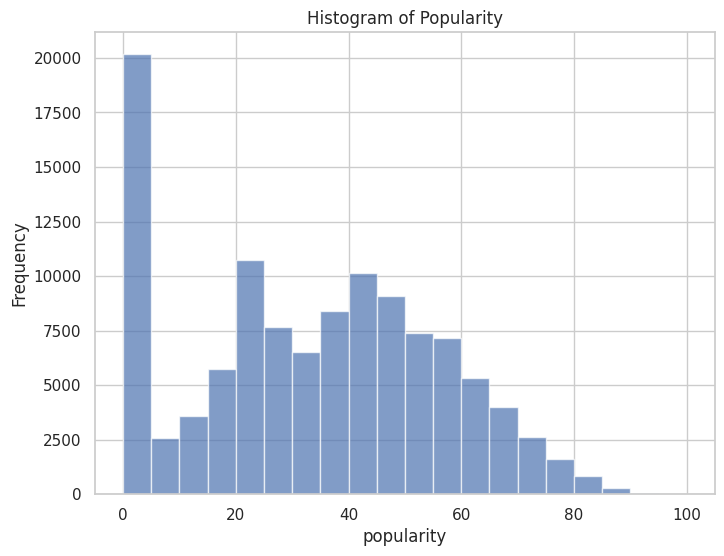

In [26]:

# Name of the column to be shown
column_name = 'popularity'

# Collect data for plotting
data = df.select(column_name).rdd.flatMap(lambda x: x).collect()

# Plot histogram
plt.figure(figsize=(8, 6))
plt.hist(data, bins=20, alpha=0.7)
plt.title('Histogram of Popularity')
plt.xlabel(column_name)
plt.ylabel('Frequency')
plt.show()


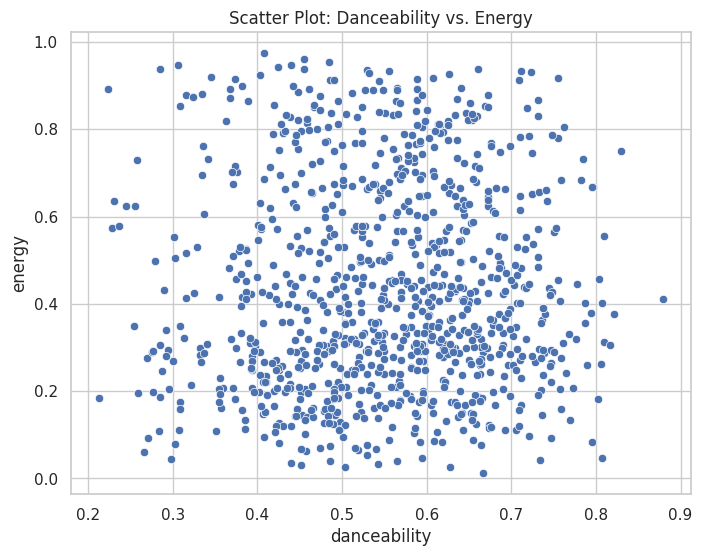

In [27]:
# Selecting danceability and enerygy for scatter graph
x_column = 'danceability'
y_column = 'energy'

# Collect data for plotting
data = df.select(x_column, y_column).limit(1000).toPandas()

# Plot scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=x_column, y=y_column, data=data)
plt.title('Scatter Plot: Danceability vs. Energy')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()


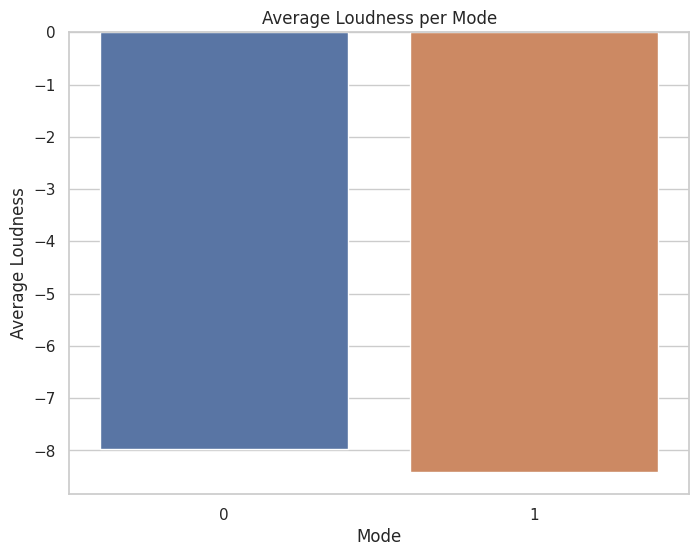

In [28]:

# Loudness and mode bar plot comparison
numeric_column = 'loudness'
categorical_column = 'mode'

# Calculate average loudness per mode
avg_loudness = df.groupBy(categorical_column).avg(numeric_column).toPandas()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=categorical_column, y='avg(' + numeric_column + ')', data=avg_loudness)
plt.title('Average Loudness per Mode')
plt.xlabel('Mode')
plt.ylabel('Average Loudness')
plt.show()


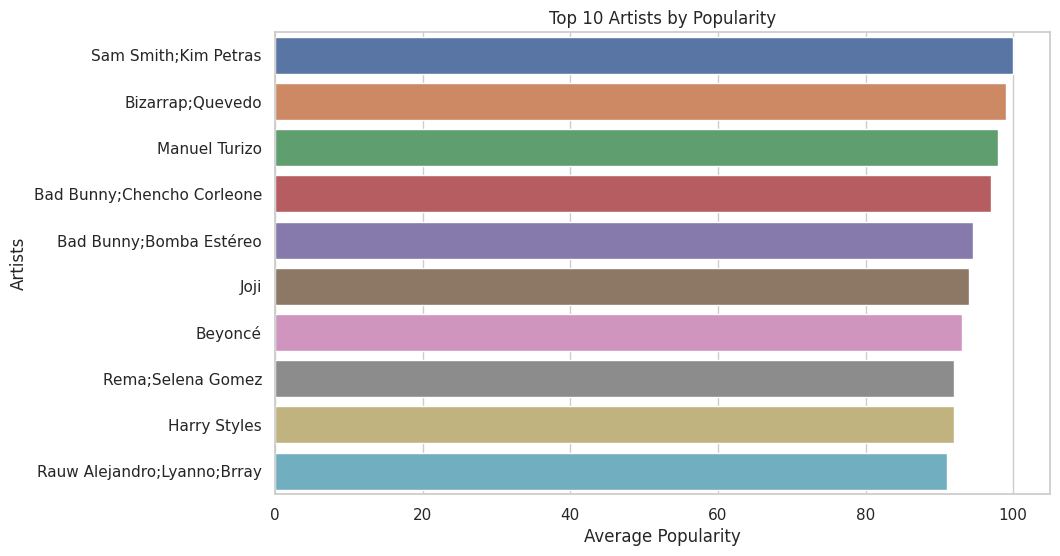

In [30]:
# Group by artists and compute the mean popularity
artist_popularity = df.groupBy('artists').agg({'popularity': 'mean'})

# Sort the result in descending order of popularity
artist_popularity = artist_popularity.sort('avg(popularity)', ascending=False)

# Take the top 10 artists by popularity
top_10_artists = artist_popularity.limit(10)

# Convert to Pandas DataFrame for visualization (optional)
top_10_artists_df = top_10_artists.toPandas()

# Visualize the top 10 artists by popularity
plt.figure(figsize=(10, 6))
sns.barplot(x='avg(popularity)', y='artists', data=top_10_artists_df)
plt.xlabel('Average Popularity')
plt.ylabel('Artists')
plt.title('Top 10 Artists by Popularity')
plt.show()


## **Feature Selection**

In [31]:
# Drop unnecessary features from the table
df1 = df
col_to_drop = ['_c0','track_id','album_name','duration_ms','explicit','key','mode','time_signature',
               'danceability','energy','loudness','speechiness','acousticness','instrumentalness',
               'liveness','valence','tempo']

df = df.drop(*col_to_drop)

In [32]:
print(df.columns)

['artists', 'track_name', 'popularity', 'track_genre']


In [33]:
df = df.withColumn('Ratings', col('popularity') / 10)

In [34]:
df.select('Ratings').show()

+-------+
|Ratings|
+-------+
|    7.3|
|    5.5|
|    5.7|
|    7.1|
|    8.2|
|    5.8|
|    7.4|
|    8.0|
|    7.4|
|    5.6|
|    7.4|
|    6.9|
|    5.2|
|    6.2|
|    5.6|
|    5.8|
|    5.6|
|    5.4|
|    6.8|
|    6.7|
+-------+
only showing top 20 rows



In [35]:
df.printSchema()

root
 |-- artists: string (nullable = true)
 |-- track_name: string (nullable = true)
 |-- popularity: float (nullable = true)
 |-- track_genre: string (nullable = true)
 |-- Ratings: double (nullable = true)



In [36]:
print(df.filter(df['Ratings'].isNull()).count())

0


In [37]:
df = df.na.drop()

In [38]:
print(df.filter(df['Ratings'].isNull()).count())

0


## **Feature Encoding**

In [40]:
artist_indexer = StringIndexer(inputCols=['artists'], outputCols=['artists_id'])
df = artist_indexer.fit(df).transform(df)

track_name_indexer = StringIndexer(inputCols=['track_name'], outputCols=['track_name_id'])
df = track_name_indexer.fit(df).transform(df)

track_genre_indexer = StringIndexer(inputCols=['track_genre'], outputCols=['track_genre_id'])
df = track_genre_indexer.fit(df).transform(df)

In [41]:
df.show(4)

+--------------------+--------------------+----------+-----------+-------+----------+-------------+--------------+
|             artists|          track_name|popularity|track_genre|Ratings|artists_id|track_name_id|track_genre_id|
+--------------------+--------------------+----------+-----------+-------+----------+-------------+--------------+
|         Gen Hoshino|              Comedy|      73.0|   acoustic|    7.3|    2101.0|       2464.0|           0.0|
|        Ben Woodward|    Ghost - Acoustic|      55.0|   acoustic|    5.5|    1493.0|       4676.0|           0.0|
|Ingrid Michaelson...|      To Begin Again|      57.0|   acoustic|    5.7|   21277.0|      63732.0|           0.0|
|        Kina Grannis|Can't Help Fallin...|      71.0|   acoustic|    7.1|    1296.0|       1168.0|           0.0|
+--------------------+--------------------+----------+-----------+-------+----------+-------------+--------------+
only showing top 4 rows



In [43]:
hdf = df.toHandy()
hdf.show()

/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pyspark/sql/dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+--------------------+--------------------+----------+-----------+-------+----------+-------------+--------------+
|             artists|          track_name|popularity|track_genre|Ratings|artists_id|track_name_id|track_genre_id|
+--------------------+--------------------+----------+-----------+-------+----------+-------------+--------------+
|         Gen Hoshino|              Comedy|      73.0|   acoustic|    7.3|    2101.0|       2464.0|           0.0|
|        Ben Woodward|    Ghost - Acoustic|      55.0|   acoustic|    5.5|    1493.0|       4676.0|           0.0|
|Ingrid Michaelson...|      To Begin Again|      57.0|   acoustic|    5.7|   21277.0|      63732.0|           0.0|
|        Kina Grannis|Can't Help Fallin...|      71.0|   acoustic|    7.1|    1296.0|       1168.0|           0.0|
|    Chord Overstreet|             Hold On|      82.0|   acoustic|    8.2|    1855.0|        148.0|           0.0|
|        Tyrone Wells|Days I Will Remember|      58.0|   acoustic|    5.8|    63

## **ALS model Implementation**

In [44]:

train_data, test_data = df.randomSplit([0.8, 0.2], seed=42)

# Define the ALS model
als = ALS(
    maxIter=25,
    regParam=0.01,
    userCol='artists_id',
    itemCol='track_name_id',
    ratingCol='Ratings',
    coldStartStrategy='drop'
)

# Fit the ALS model to the data
model = als.fit(df)

In [ ]:
selected_music_name = "To Begin Again"  # Give the name of the music you want

# Filter the DataFrame to get the row with the selected music name
selected_music_df = df.filter(df['track_name'] == selected_music_name)

# Encode the selected music_name into music_id
indexer = StringIndexer(inputCol='track_name', outputCol='encoded_music_id')
indexed_model = indexer.fit(df)
selected_music_df = indexed_model.transform(selected_music_df)

# Get recommendations for the encoded music_id
encoded_recommendations = model.recommendForItemSubset(selected_music_df, 5)  # Get top 5 recommendations for the selected Music Name

# Explode the recommendations to process each row individually
exploded = encoded_recommendations.select(explode("recommendations").alias("rec"))
exploded = exploded.select("rec.*")

# Use IndexToString to decode the recommended music_id back into music_name
converter = IndexToString(inputCol="artists_id", outputCol="recommended_music_name", labels=indexed_model.labels)
decoded_recommendations = converter.transform(exploded)

# Show the decoded top recommended Music Names for each user
decoded_recommendations.show(truncate=False)

+----------+---------+---------------------------+
|artists_id|rating   |decoded_music_name         |
+----------+---------+---------------------------+
|21277     |5.697905 |Arrowhead                  |
|9787      |5.281102 |Fan Whir                   |
|25632     |5.1687922|Celtica (Voice of Morrigan)|
|3915      |5.095434 |Astral Projection          |
|12387     |5.065801 |Mariposas                  |
+----------+---------+---------------------------+



Performacnce Analysis of ALS model

In [2]:

# Generate predictions on the test set
predictions = model.transform(test_data)

# Create evaluators for RMSE and MAE
evaluator_rmse = RegressionEvaluator(metricName='rmse', labelCol='Ratings', predictionCol='prediction')
evaluator_mae = RegressionEvaluator(metricName='mae', labelCol='Ratings', predictionCol='prediction')

# Compute RMSE and MAE
rmse = evaluator_rmse.evaluate(predictions)
mae = evaluator_mae.evaluate(predictions)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")


ModuleNotFoundError: No module named 'pyspark'

In [ ]:
# Generate top 'n' recommendations for all users
userRecs = model.recommendForAllUsers(5)

In [ ]:
# Explode the 'recommendations' column to get individual rows for each recommendation
recommendation = userRecs.select(userRecs['artists_id'], userRecs['recommendations.track_name_id'].alias('Ratings'))

# Show the top recommended Music IDs for each user
recommendation.show(truncate=False)

+----------+-----------------------------------+
|artists_id|Ratings                            |
+----------+-----------------------------------+
|1         |[87597, 53924, 63024, 41035, 85183]|
|3         |[4239, 2978, 3175, 3664, 3873]     |
|5         |[1736, 3, 24555, 85967, 11234]     |
|6         |[3351, 3223, 3064, 2760, 1960]     |
|9         |[3715, 13736, 3021, 81269, 6265]   |
|12        |[79490, 13462, 8826, 50635, 86537] |
|13        |[3464, 6903, 16620, 6767, 11071]   |
|15        |[2049, 4703, 2417, 9502, 8607]     |
|16        |[54953, 5515, 15699, 6112, 44743]  |
|17        |[937, 3280, 1258, 3653, 1712]      |
|19        |[13079, 6482, 14187, 15068, 10275] |
|20        |[7949, 15055, 16631, 3734, 7726]   |
|22        |[3715, 2218, 1172, 2724, 5073]     |
|26        |[59245, 73557, 25262, 5371, 68042] |
|27        |[78099, 22487, 78666, 17977, 16087]|
|28        |[49298, 4, 4422, 19624, 81557]     |
|31        |[2826, 77678, 52253, 68383, 35077] |
|34        |[12900, 